<a href="https://colab.research.google.com/github/Nouvalgt/awikwok/blob/main/TugasBuTati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Memanggil dataset dari google drive
data = pd.read_csv('/content/drive/MyDrive/awikwok/Student Mental health.csv')

In [211]:
# Menampilkan beberapa baris pertama dari dataset
print("\nBeberapa Baris Pertama Dataset:")
data.head()


Beberapa Baris Pertama Dataset:


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [212]:
# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
data.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     

In [213]:
# Mendeskripsi data
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


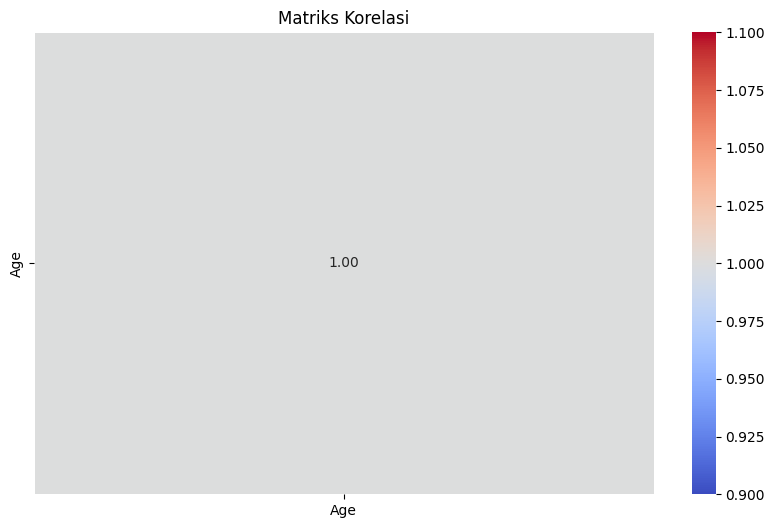

In [214]:
# Exploratory Data Analysis (EDA)
# Menghitung matriks korelasi untuk kolom numerik
numeric_columns = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Menampilkan matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()


In [215]:
# Mengonversi kolom kategorikal menjadi numerik
data['Choose your gender'] = data['Choose your gender'].map({'Female': 1, 'Male': 0})
data['Do you have Depression?'] = data['Do you have Depression?'].map({'Yes': 1, 'No': 0})
data['Do you have Anxiety?'] = data['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
data['Do you have Panic attack?'] = data['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})
data['Marital status'] = data['Marital status'].map({'Yes': 1, 'No': 0})

# Mengonversi 'What is your CGPA?' menjadi numerik
def convert_cgpa_to_numeric(cgpa_range):
    if isinstance(cgpa_range, str):
        try:
            cgpa_min, cgpa_max = cgpa_range.split(' - ')
            return (float(cgpa_min) + float(cgpa_max)) / 2
        except ValueError:
            return None
    return None

data['What is your CGPA?'] = data['What is your CGPA?'].apply(convert_cgpa_to_numeric)
# Menampilkan informasi dataset setelah konversi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    int64  
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    float64
 6   Marital status                                101 non-null    int64  
 7   Do you have Depression?                       101 non-null    int64  
 8   Do you have Anxiety?                          101 non-null    int64  
 9   Do you have Panic attack?                     101 non-null    int

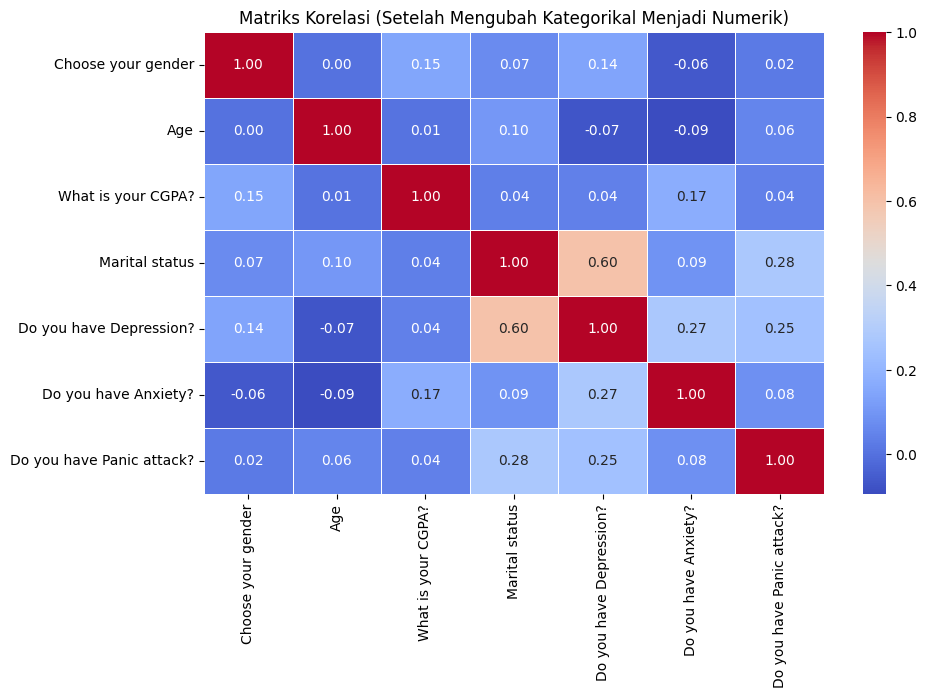

In [216]:
# Menghitung matriks korelasi dengan memasukkan kolom yang telah diubah menjadi numerik
# Memilih kolom numerik yang relevan
numeric_columns = data.select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = numeric_columns.corr()

# Visualisasikan matriks korelasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi (Setelah Mengubah Kategorikal Menjadi Numerik)')
plt.show()

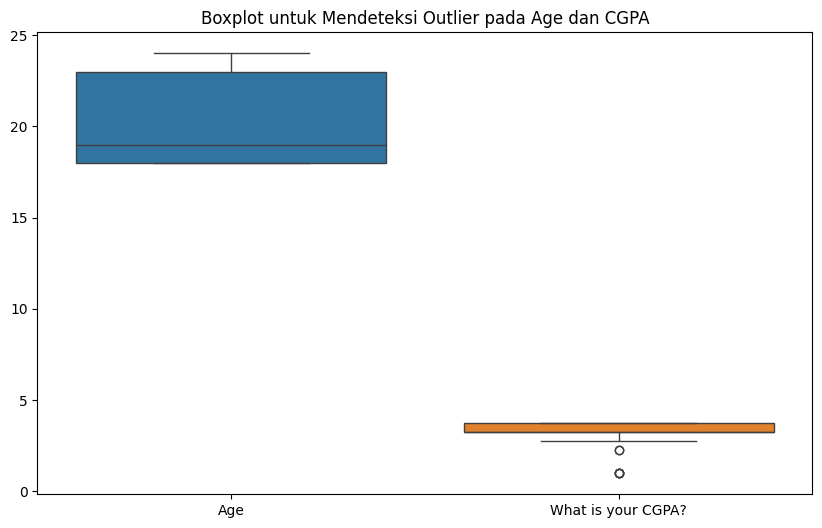

In [217]:
# Deteksi Outlier dengan Boxplot (Hanya untuk kolom 'Age' dan 'What is your CGPA?')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'What is your CGPA?']])
plt.title('Boxplot untuk Mendeteksi Outlier pada Age dan CGPA')
plt.show()


Outlier untuk Age:
Empty DataFrame
Columns: [Timestamp, Choose your gender, Age, What is your course?, Your current year of Study, What is your CGPA?, Marital status, Do you have Depression?, Do you have Anxiety?, Do you have Panic attack?, Did you seek any specialist for a treatment?]
Index: []
Outlier untuk What is your CGPA?:
              Timestamp  Choose your gender   Age What is your course?  \
35       8/7/2020 14:43                   1  18.0          Engineering   
43       8/7/2020 15:07                   0   NaN                  BIT   
73        9/7/2020 6:57                   0  18.0   Biomedical science   
78  13/07/2020 10:07:32                   1  19.0        Biotechnology   
89  13/07/2020 11:54:58                   0  24.0          Engineering   
94  13/07/2020 17:30:44                   1  24.0                 Fiqh   

   Your current year of Study  What is your CGPA?  Marital status  \
35                     year 1               2.245               0   
43          

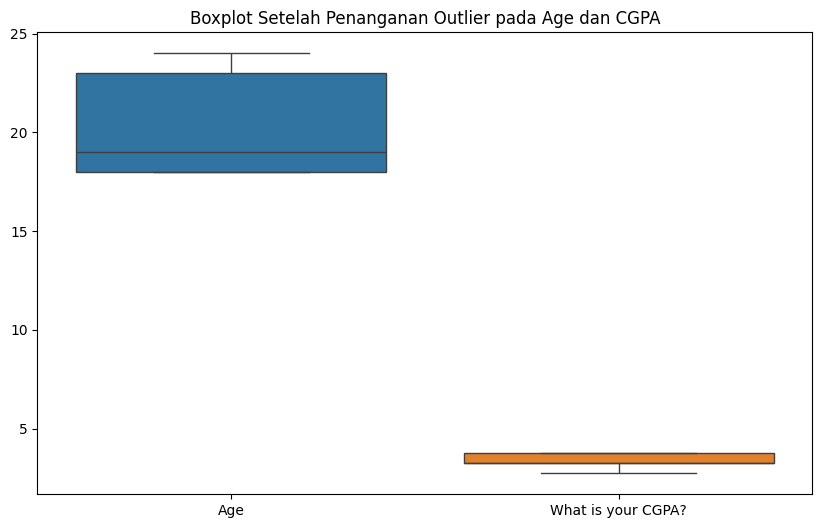

In [218]:
# Fungsi untuk mendeteksi dan menangani outlier dengan IQR (Interquartile Range)
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menampilkan data outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outlier untuk {column}:")
    print(outliers)

    # Menangani outlier: mengganti dengan nilai median
    data[column] = np.where(data[column] > upper_bound, data[column].median(), data[column])
    data[column] = np.where(data[column] < lower_bound, data[column].median(), data[column])

    return data

# Menangani outlier pada kolom 'Age' dan 'What is your CGPA?'
data = handle_outliers(data, 'Age')
data = handle_outliers(data, 'What is your CGPA?')

# Boxplot kedua: Menampilkan Boxplot setelah penanganan outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'What is your CGPA?']])
plt.title('Boxplot Setelah Penanganan Outlier pada Age dan CGPA')
plt.show()

In [219]:
# Memeriksa kolom yang relevan untuk clustering (misalnya Age, Gender, Depression, Anxiety, Panic attack)
required_columns = ['Age', 'Choose your gender', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'What is your CGPA?']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Kolom berikut tidak tersedia dalam dataset: {missing_columns}")
else:
    print("Semua kolom yang diperlukan tersedia.")

Semua kolom yang diperlukan tersedia.


In [220]:
# Mengecek nilai yang hilang dalam dataset
missing_data = data.isnull().sum()
print("Jumlah Nilai yang Hilang per Kolom:")
print(missing_data)

Jumlah Nilai yang Hilang per Kolom:
Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


In [221]:
print("Jumlah data duplikat:", data.duplicated().sum())

Jumlah data duplikat: 0


In [222]:
# Imputasi nilai yang hilang pada kolom 'Age' dengan median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Memverifikasi bahwa nilai yang hilang sudah ditangani
missing_data_after_imputation = data.isnull().sum()
print("Jumlah Nilai yang Hilang per Kolom Setelah Imputasi:")
print(missing_data_after_imputation)

Jumlah Nilai yang Hilang per Kolom Setelah Imputasi:
Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


<ipython-input-222-8adbeb760bf8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [223]:
# Menentukan kolom yang relevan untuk clustering
# Kolom-kolom yang dipilih adalah: Age, CGPA, Gender, Depression, Anxiety, Panic attack
relevant_columns = ['Age', 'What is your CGPA?', 'Choose your gender', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']

# Memilih data yang relevan untuk analisis lebih lanjut
data_for_analysis = data[relevant_columns]

# Menampilkan beberapa baris pertama dari data yang relevan
print("Data yang Dipilih untuk Analisis:")
data_for_analysis.head()

Data yang Dipilih untuk Analisis:


,Age,What is your CGPA?,Choose your gender,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
0,18.0,3.245,1,1,0,1
1,21.0,3.245,0,0,1,0
2,19.0,3.245,0,1,1,1
3,22.0,3.245,1,1,0,0
4,23.0,3.245,0,0,0,0



Data dengan Hasil Clustering:
    Age  What is your CGPA?  Choose your gender  Do you have Depression?  \
0  18.0               3.245                   1                        1   
1  21.0               3.245                   0                        0   
2  19.0               3.245                   0                        1   
3  22.0               3.245                   1                        1   
4  23.0               3.245                   0                        0   

   Do you have Anxiety?  Do you have Panic attack?  Cluster  
0                     0                          1        0  
1                     1                          0        2  
2                     1                          1        0  
3                     0                          0        0  
4                     0                          0        2  


<ipython-input-224-aff0559de3ea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis['Cluster'] = clusters


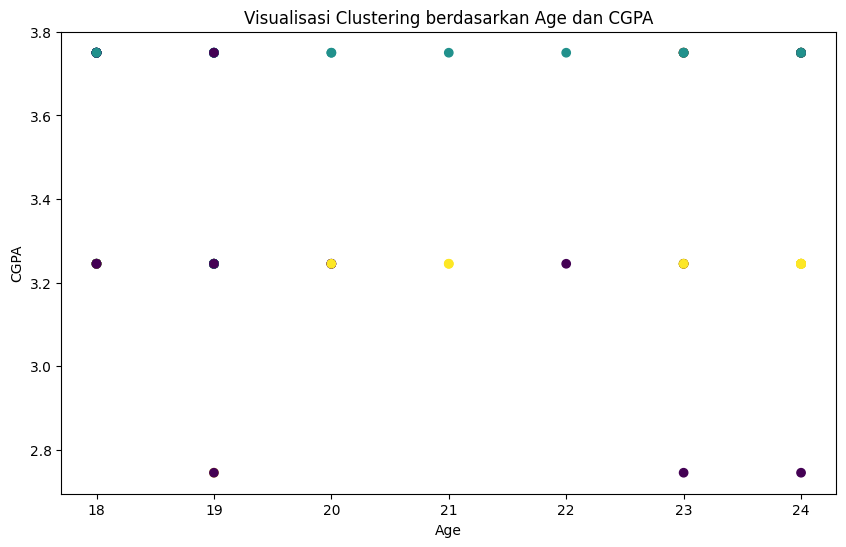

In [224]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menstandarisasi data agar fitur-fitur yang berbeda memiliki skala yang sama
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_analysis)

# Membuat model KMeans dengan 3 klaster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan hasil klaster ke dataset
data_for_analysis['Cluster'] = clusters

# Menampilkan beberapa baris pertama dengan klaster
print("\nData dengan Hasil Clustering:")
print(data_for_analysis.head())

# Visualisasi klaster
plt.figure(figsize=(10, 6))
plt.scatter(data_for_analysis['Age'], data_for_analysis['What is your CGPA?'], c=data_for_analysis['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('CGPA')
plt.title('Visualisasi Clustering berdasarkan Age dan CGPA')
plt.show()